Centroid Coordinates:
Centroid 1: (Risk=-0.0699, NoFaceContact=1.6471, Sick=0.8863)
Centroid 2: (Risk=-0.1597, NoFaceContact=3.7871, Sick=0.9226)


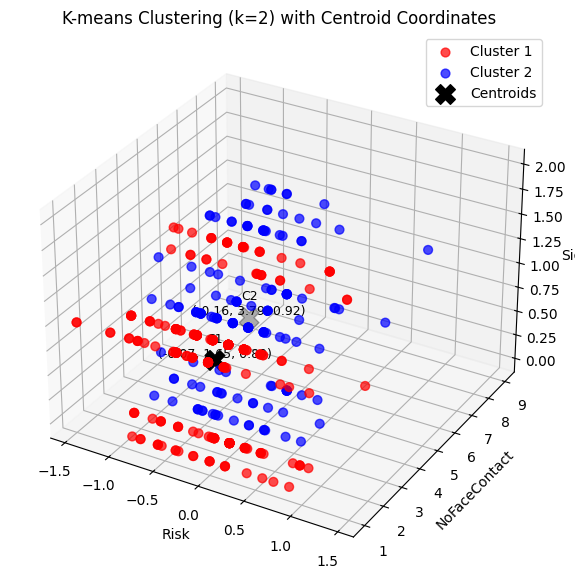

(array([0, 1]), array([255, 155]))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Load the flu dataset
flu_dataframe = pd.read_csv("flu_data.csv")

# Replace missing or empty values with 0
flu_dataframe = flu_dataframe.fillna(0)

# Extract relevant features
input_features = flu_dataframe[['Risk', 'NoFaceContact', 'Sick']].values

# Calculate Euclidean distance between two points
def calculate_euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Randomly initialize k centroids from the data
def select_initial_centroids(data_points, num_clusters):
    random_indices = np.random.choice(data_points.shape[0], num_clusters, replace=False)
    return data_points[random_indices]

# Assign each data point to the nearest centroid
def assign_data_to_clusters(data_points, centroids):
    assigned_clusters = []
    for point in data_points:
        distances = [calculate_euclidean_distance(point, centroid) for centroid in centroids]
        closest_cluster_index = np.argmin(distances)
        assigned_clusters.append(closest_cluster_index)
    return np.array(assigned_clusters)

# Recalculate centroids as the mean of their assigned points
def recalculate_centroids(data_points, cluster_labels, num_clusters):
    updated_centroids = []
    for cluster_index in range(num_clusters):
        points_in_cluster = data_points[cluster_labels == cluster_index]
        if len(points_in_cluster) == 0:
            # Handle empty cluster by reinitializing randomly
            updated_centroids.append(data_points[random.randint(0, data_points.shape[0] - 1)])
        else:
            updated_centroids.append(np.mean(points_in_cluster, axis=0))
    return np.array(updated_centroids)

# Full K-means clustering algorithm
def perform_kmeans_clustering(data_points, num_clusters, max_iterations=100):
    centroids = select_initial_centroids(data_points, num_clusters)
    for _ in range(max_iterations):
        cluster_labels = assign_data_to_clusters(data_points, centroids)
        updated_centroids = recalculate_centroids(data_points, cluster_labels, num_clusters)
        if np.allclose(centroids, updated_centroids):
            break
        centroids = updated_centroids
    return cluster_labels, centroids

# Set number of clusters
num_clusters = 2
cluster_labels, final_centroids = perform_kmeans_clustering(input_features, num_clusters)

# Output the centroid coordinates
print("Centroid Coordinates:")
for idx, centroid in enumerate(final_centroids):
    print(f"Centroid {idx + 1}: (Risk={centroid[0]:.4f}, NoFaceContact={centroid[1]:.4f}, Sick={centroid[2]:.4f})")

# 3D scatter plot of clustering results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

cluster_colors = ['red', 'blue']
cluster_labels_legend = ['Cluster 1', 'Cluster 2']

for cluster_idx in np.unique(cluster_labels):
    ax.scatter(input_features[cluster_labels == cluster_idx][:, 0],
               input_features[cluster_labels == cluster_idx][:, 1],
               input_features[cluster_labels == cluster_idx][:, 2],
               c=cluster_colors[cluster_idx],
               label=cluster_labels_legend[cluster_idx],
               s=40, alpha=0.7)

# Plot centroids
ax.scatter(final_centroids[:, 0], final_centroids[:, 1], final_centroids[:, 2],
           c='black', marker='X', s=200, label='Centroids')

# Annotate centroid coordinates
for i, (x, y, z) in enumerate(final_centroids):
    ax.text(x, y, z, f'C{i+1}\n({x:.2f}, {y:.2f}, {z:.2f})',
            fontsize=9, color='black', ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
ax.set_title('K-means Clustering (k=2) with Centroid Coordinates')
ax.legend()
plt.show()

# Show cluster membership counts
np.unique(cluster_labels, return_counts=True)


k=2 | successful attempt #1 | cluster distribution: (array([0, 1]), array([255, 155]))


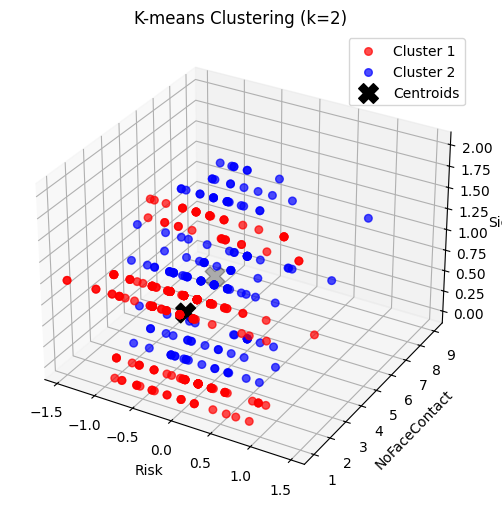

k=3 | successful attempt #1 | cluster distribution: (array([0, 1, 2]), array([ 63, 211, 136]))


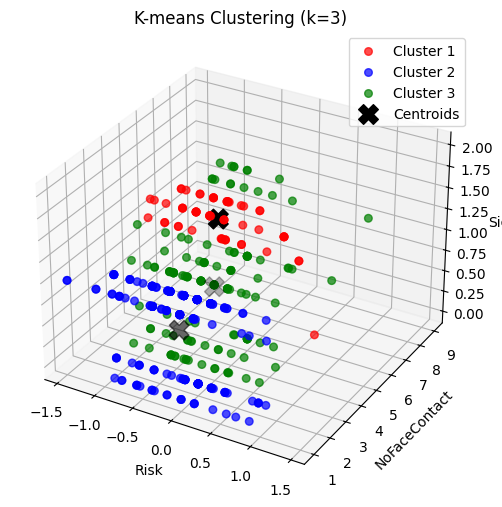

k=4 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3]), array([ 63,  77,  73, 197]))


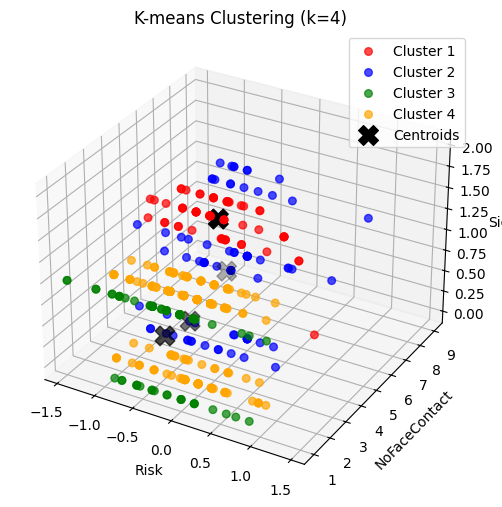

k=5 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3, 4]), array([ 37,  71, 207,  48,  47]))


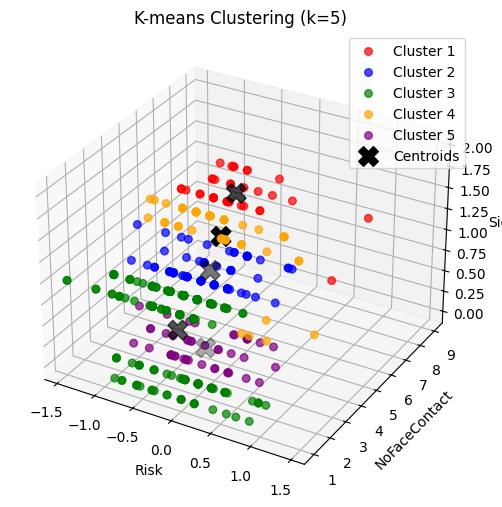

k=6 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3, 4, 5]), array([ 48,  60,  41, 121,  86,  54]))


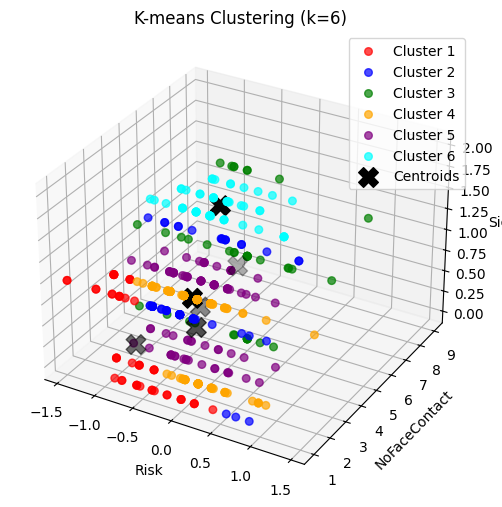

k=7 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3, 4, 5, 6]), array([81, 69, 44, 36, 88, 37, 55]))


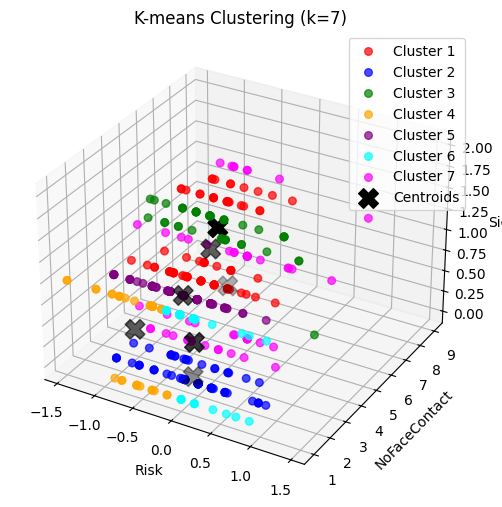

k=8 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3, 4, 5, 6, 7]), array([20, 28, 65, 55, 86, 88, 41, 27]))


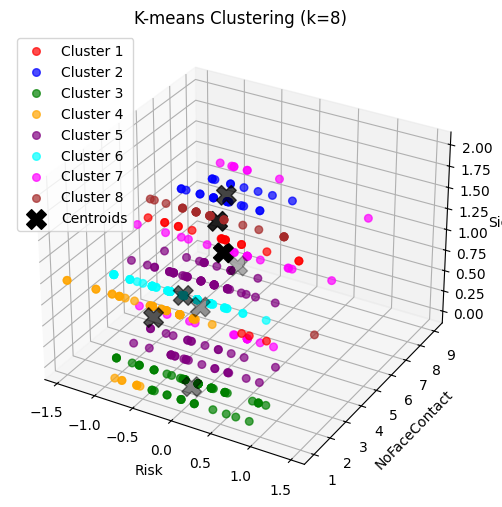

k=9 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([41, 49, 35, 35, 69, 53, 42, 48, 38]))


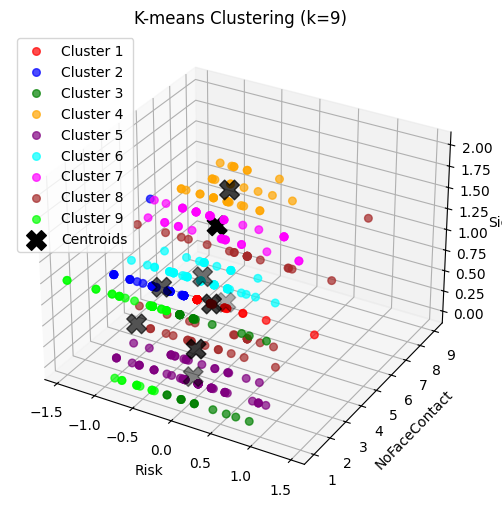

k=10 | successful attempt #1 | cluster distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([27, 43, 71, 10, 44, 59, 25, 42, 72, 17]))


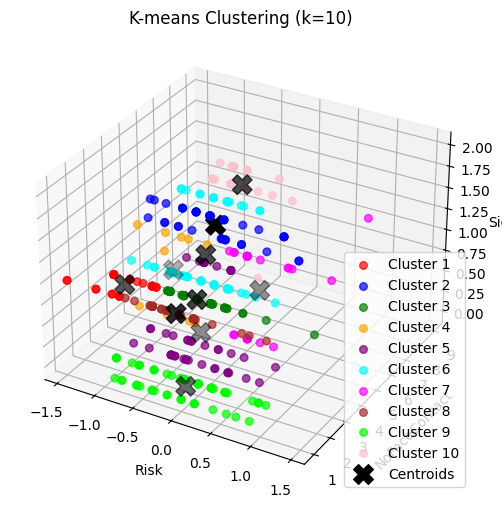

In [3]:
# 1b Define distinct colors for up to 10 clusters
cluster_color_palette = ['red', 'blue', 'green', 'orange', 'purple',
                         'cyan', 'magenta', 'brown', 'lime', 'pink']

# Iterate through different cluster counts (k) from 2 to 10
for num_clusters in range(2, 11):
    # Retry up to 10 times to ensure we find exactly num_clusters clusters
    for attempt_number in range(10):
        cluster_labels, final_centroids = perform_kmeans_clustering(input_features, num_clusters)
        if len(np.unique(cluster_labels)) == num_clusters:
            cluster_distribution = np.unique(cluster_labels, return_counts=True)
            print(f"k={num_clusters} | successful attempt #{attempt_number + 1} | cluster distribution: {cluster_distribution}")
            break
    else:
        print(f"⚠️ k={num_clusters} failed to find {num_clusters} distinct clusters.")
        continue

    # Create 3D scatter plot for this k value
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    for cluster_index in np.unique(cluster_labels):
        ax.scatter(input_features[cluster_labels == cluster_index][:, 0],
                   input_features[cluster_labels == cluster_index][:, 1],
                   input_features[cluster_labels == cluster_index][:, 2],
                   c=cluster_color_palette[cluster_index],
                   label=f'Cluster {cluster_index + 1}',
                   s=30,
                   alpha=0.7)

    # Plot the centroids in black with 'X' marker
    ax.scatter(final_centroids[:, 0],
               final_centroids[:, 1],
               final_centroids[:, 2],
               c='black', marker='X', s=200, label='Centroids')

    # Add plot labels and legend
    ax.set_xlabel('Risk')
    ax.set_ylabel('NoFaceContact')
    ax.set_zlabel('Sick')
    ax.set_title(f'K-means Clustering (k={num_clusters})')
    ax.legend()
    plt.show()


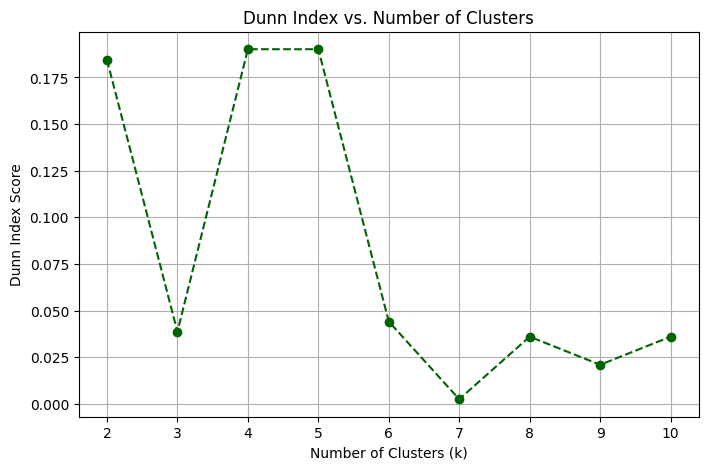


✅ Optimal number of clusters based on Dunn Index: k = 4 (Score = 0.1901)


In [12]:
# Define the Dunn Index to evaluate clustering quality
def compute_dunn_index(data_points, cluster_labels):
    unique_cluster_ids = np.unique(cluster_labels)
    total_cluster_count = len(unique_cluster_ids)

    # Step 1: Compute maximum intra-cluster distance (i.e., compactness)
    maximum_intra_cluster_distance = 0
    for cluster_id in unique_cluster_ids:
        points_in_cluster = data_points[cluster_labels == cluster_id]
        if len(points_in_cluster) <= 1:
            continue  # Skip clusters with fewer than 2 points
        for i in range(len(points_in_cluster)):
            for j in range(i + 1, len(points_in_cluster)):
                distance = calculate_euclidean_distance(points_in_cluster[i], points_in_cluster[j])
                if distance > maximum_intra_cluster_distance:
                    maximum_intra_cluster_distance = distance

    # Step 2: Compute minimum inter-cluster distance (i.e., separation)
    minimum_inter_cluster_distance = float('inf')
    for i in range(total_cluster_count):
        for j in range(i + 1, total_cluster_count):
            cluster_i_points = data_points[cluster_labels == unique_cluster_ids[i]]
            cluster_j_points = data_points[cluster_labels == unique_cluster_ids[j]]
            for point_i in cluster_i_points:
                for point_j in cluster_j_points:
                    distance = calculate_euclidean_distance(point_i, point_j)
                    if distance < minimum_inter_cluster_distance:
                        minimum_inter_cluster_distance = distance

    # Avoid division by zero
    if maximum_intra_cluster_distance == 0:
        return 0

    # Dunn Index = (minimum inter-cluster distance) / (maximum intra-cluster distance)
    return minimum_inter_cluster_distance / maximum_intra_cluster_distance

# Store Dunn Index scores for each number of clusters
dunn_index_results = []

# Try k values from 2 to 10
for num_clusters in range(2, 11):
    for retry_attempt in range(10):  # Try multiple times to ensure valid clusters
        cluster_labels, final_centroids = perform_kmeans_clustering(input_features, num_clusters)
        if len(np.unique(cluster_labels)) == num_clusters:
            dunn_score = compute_dunn_index(input_features, cluster_labels)
            dunn_index_results.append((num_clusters, dunn_score))
            break
    else:
        print(f"⚠️ Skipped k={num_clusters}: Could not find {num_clusters} distinct clusters.")
        dunn_index_results.append((num_clusters, 0))

# Split cluster counts and Dunn Index values for plotting
cluster_counts_list = [entry[0] for entry in dunn_index_results]
dunn_score_values = [entry[1] for entry in dunn_index_results]

# Plot Dunn Index vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_counts_list, dunn_score_values, marker='o', linestyle='--', color='darkgreen')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Dunn Index Score")
plt.title("Dunn Index vs. Number of Clusters")
plt.grid(True)
plt.show()

# Identify the best clustering configuration based on Dunn Index
index_of_best_score = np.argmax(dunn_score_values)
optimal_cluster_count = cluster_counts_list[index_of_best_score]
optimal_dunn_score = dunn_score_values[index_of_best_score]
print(f"\n✅ Optimal number of clusters based on Dunn Index: k = {optimal_cluster_count} (Score = {optimal_dunn_score:.4f})")


In [ ]:
#q-2a
# Extend the feature set to include 'KnowlTrans' (total 4 features)
extended_input_features_4d = flu_dataframe[['Risk', 'NoFaceContact', 'Sick', 'KnowlTrans']].fillna(0).values

# Set the optimal number of clusters based on the result from Question 1c
optimal_cluster_count = optimal_cluster_count  # Replace this if your best k was different

# Retry clustering multiple times until valid number of clusters is found
for retry_attempt in range(10):
    cluster_labels_4d, centroids_4d = perform_kmeans_clustering(extended_input_features_4d, optimal_cluster_count)
    if len(np.unique(cluster_labels_4d)) == optimal_cluster_count:
        dunn_score_4d = compute_dunn_index(extended_input_features_4d, cluster_labels_4d)
        break
else:
    print(f"❌ Failed to find valid clustering with k={optimal_cluster_count} using 4 features.")
    dunn_score_4d = 0

print(f"\n✅ Dunn Index using 4 features (Risk, NoFaceContact, Sick, KnowlTrans): {dunn_score_4d:.4f}")



✅ Dunn Index using 4 features (Risk, NoFaceContact, Sick, KnowlTrans): 0.0657


In [15]:
# question-2b 
# Extend the feature set to include 'HndWshQual' (total 5 features)
extended_input_features_5d = flu_dataframe[['Risk', 'NoFaceContact', 'Sick', 'KnowlTrans', 'HndWshQual']].fillna(0).values

# Use the optimal number of clusters determined from Question 1c
optimal_cluster_count = 4  # Replace this if your best k value was different

# Retry clustering up to 10 times to ensure a valid result
for retry_attempt in range(10):
    cluster_labels_5d, centroids_5d = perform_kmeans_clustering(extended_input_features_5d, optimal_cluster_count)
    if len(np.unique(cluster_labels_5d)) == optimal_cluster_count:
        dunn_score_5d = compute_dunn_index(extended_input_features_5d, cluster_labels_5d)
        break
else:
    print(f"❌ Failed to find valid clustering with k={optimal_cluster_count} using 5 features.")
    dunn_score_5d = 0

print(f"\n✅ Dunn Index using 5 features (Risk, NoFaceContact, Sick, KnowlTrans, HndWshQual): {dunn_score_5d:.4f}")



✅ Dunn Index using 5 features (Risk, NoFaceContact, Sick, KnowlTrans, HndWshQual): 0.1102


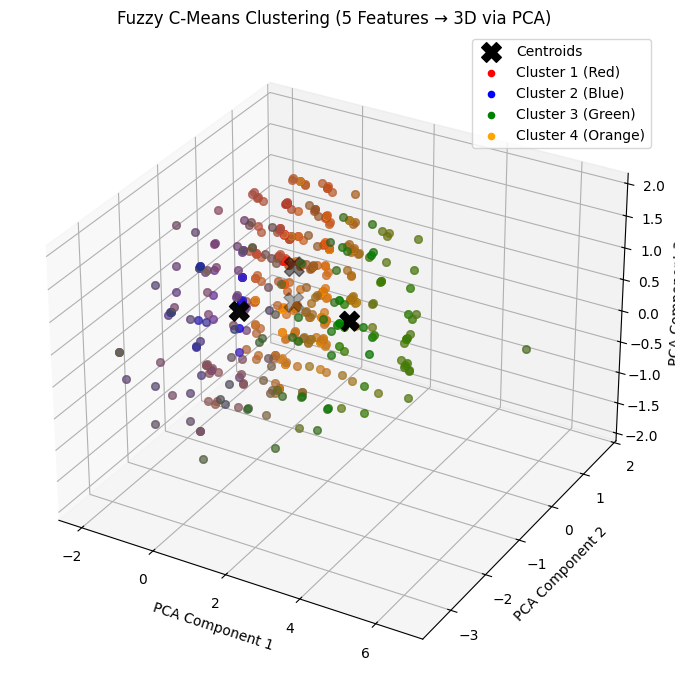

In [7]:
#q3a
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ---------- Step 1: Prepare the Input Data (5 Features) ----------
fcm_input_features_5d = flu_dataframe[['Risk', 'NoFaceContact', 'Sick', 'KnowlTrans', 'HndWshQual']].fillna(0).values

# ---------- Step 2: Fuzzy C-Means Function Implemented ----------
def apply_fuzzy_c_means_clustering(data, num_clusters, m=2.0, max_iter=150, error=1e-5):
    n_samples, n_features = data.shape
    membership = np.random.dirichlet(np.ones(num_clusters), size=n_samples)

    for iteration in range(max_iter):
        # Compute centroids
        centroids = np.zeros((num_clusters, n_features))
        for c in range(num_clusters):
            weights = membership[:, c] ** m
            weighted_sum = np.sum(weights[:, np.newaxis] * data, axis=0)
            total_weight = np.sum(weights)
            centroids[c] = weighted_sum / total_weight

        # Update membership matrix
        new_membership = np.zeros_like(membership)
        for i in range(n_samples):
            for c in range(num_clusters):
                denom = 0
                for j in range(num_clusters):
                    dist_to_c = np.linalg.norm(data[i] - centroids[c])
                    dist_to_j = np.linalg.norm(data[i] - centroids[j]) + 1e-10
                    denom += (dist_to_c / dist_to_j) ** (2 / (m - 1))
                new_membership[i, c] = 1 / denom

        # Convergence check
        if np.linalg.norm(new_membership - membership) < error:
            break

        membership = new_membership

    hard_labels = np.argmax(membership, axis=1)
    return centroids, membership, hard_labels

# ---------- Step 3: Apply Fuzzy C-Means with 5 Features ----------
optimal_cluster_count = 4
fcm_centroids_5d, fcm_membership_matrix_5d, fcm_final_labels_5d = apply_fuzzy_c_means_clustering(
    fcm_input_features_5d, optimal_cluster_count
)

# ---------- Step 4: Reduce Dimensions from 5D to 3D Using PCA ----------
pca = PCA(n_components=3)
fcm_input_features_3d = pca.fit_transform(fcm_input_features_5d)
fcm_centroids_3d = pca.transform(fcm_centroids_5d)

# ---------- Step 5: Visualize Soft Membership Clustering in 3D ----------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

cluster_colors = ['red', 'blue', 'green', 'orange']
legend_descriptions = [
    'Cluster 1 (Red)', 'Cluster 2 (Blue)', 'Cluster 3 (Green)', 'Cluster 4 (Orange)'
]

# Scatter plot with soft membership transparency
for cluster_idx in range(optimal_cluster_count):
    for sample_idx in range(fcm_input_features_3d.shape[0]):
        transparency = fcm_membership_matrix_5d[sample_idx, cluster_idx]
        if transparency > 0.05:
            ax.scatter(fcm_input_features_3d[sample_idx, 0],
                       fcm_input_features_3d[sample_idx, 1],
                       fcm_input_features_3d[sample_idx, 2],
                       color=cluster_colors[cluster_idx],
                       alpha=transparency,
                       s=30)

# Plot centroids
ax.scatter(fcm_centroids_3d[:, 0], fcm_centroids_3d[:, 1], fcm_centroids_3d[:, 2],
           c='black', marker='X', s=200, label='Centroids')

# Add legend
for color, label in zip(cluster_colors, legend_descriptions):
    ax.scatter([], [], [], color=color, label=label)

# Labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Fuzzy C-Means Clustering (5 Features → 3D via PCA)')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [20]:
# ------------------- Question 3b -------------------

# Step 1: Harden the soft memberships from Fuzzy C-Means
fcm_labels = np.argmax(fcm_membership_matrix_5d, axis=1)

# Step 2: Compute Dunn Index for Fuzzy C-Means using existing custom function
fcm_dunn_index = compute_dunn_index(fcm_input_features_5d, fcm_labels)
print(f"✅ Dunn Index for Fuzzy C-Means - 5 features (hardened): {fcm_dunn_index:.4f}")

# Step 3: Retrieve stored Dunn Index from K-Means (already computed earlier) in question - 2b
print(f"\n✅ Dunn Index for k-means using - 5 features : {dunn_score_5d:.4f}")


✅ Dunn Index for Fuzzy C-Means - 5 features (hardened): 0.0592

✅ Dunn Index for k-means using - 5 features : 0.1102


In [22]:
# ------------------- Question 3c (with 6 Features) -------------------

# ---------- Step 1: Add 3 More Features to the Base Set ----------
# Base: 'Risk', 'NoFaceContact', 'Sick'
# Added: 'HndWshFreq', 'HandSanit', 'PersnDist'
selected_features_with_behavior = flu_dataframe[['Risk', 'NoFaceContact', 'Sick', 'KnowlTrans', 'HndWshQual', 'PersnDist']].fillna(0).values

# ---------- Step 2: Run Fuzzy C-Means Clustering on the 6-Feature Set ----------
cluster_centers_6_features, membership_matrix_6_features, soft_labels_6_features = apply_fuzzy_c_means_clustering(
    selected_features_with_behavior, optimal_cluster_count
)

# ---------- Step 3: Convert Soft Labels to Hard Labels and Compute the Dunn Index ----------
hard_cluster_assignments_6_features = np.argmax(membership_matrix_6_features, axis=1)
dunn_index_with_behavioral_features = compute_dunn_index(selected_features_with_behavior, hard_cluster_assignments_6_features)

# ---------- Step 4: Compare Dunn Index Results ----------
print(f"✅ Dunn Index with 6 features (added PersnDist): {dunn_index_with_behavioral_features:.4f}")



✅ Dunn Index with 6 features (added PersnDist): 0.0219
